In [97]:
import requests
import json
import pandas as pd
from time import sleep, localtime, strftime
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation
import numpy as np

In [94]:
#For NOAA. https://www.ncdc.noaa.gov/cdo-web/webservices/v2#data
APIkey = 'TNFGzpuYJmRzaCLcwpflitOeEUjOUziT'
headers = {'token': APIkey}

endpoint = 'locations'
test = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/{0:s}'.format(endpoint)
call = requests.get(test,headers = headers)
call.status_code

200

In [149]:
#Data Sets available
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datasets?'
call = requests.get(url,headers = headers)
print(call.status_code)
json_data = json.loads(call.text)

200


In [150]:
dataSetDF = pd.DataFrame(json_data['results'])
dataSetDF

,datacoverage,id,maxdate,mindate,name,uid
0,1.00,GHCND,2018-06-25,1763-01-01,Daily Summaries,gov.noaa.ncdc:C00861
1,1.00,GSOM,2018-05-01,1763-01-01,Global Summary of the Month,gov.noaa.ncdc:C00946
2,1.00,GSOY,2017-01-01,1763-01-01,Global Summary of the Year,gov.noaa.ncdc:C00947
3,0.95,NEXRAD2,2018-06-25,1991-06-05,Weather Radar (Level II),gov.noaa.ncdc:C00345
4,0.95,NEXRAD3,2018-06-17,1994-05-20,Weather Radar (Level III),gov.noaa.ncdc:C00708
5,1.00,NORMAL_ANN,2010-01-01,2010-01-01,Normals Annual/Seasonal,gov.noaa.ncdc:C00821
6,1.00,NORMAL_DLY,2010-12-31,2010-01-01,Normals Daily,gov.noaa.ncdc:C00823
7,1.00,NORMAL_HLY,2010-12-31,2010-01-01,Normals Hourly,gov.noaa.ncdc:C00824
8,1.00,NORMAL_MLY,2010-12-01,2010-01-01,Normals Monthly,gov.noaa.ncdc:C00822
9,0.25,PRECIP_15,2014-01-01,1970-05-12,Precipitation 15 Minute,gov.noaa.ncdc:C00505


In [137]:
typeBase = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datacategories?'
limit = 'limit=50'
#dataCat = 'datacategoryid=TEMP'
url = typeBase+limit
print(url)
call = requests.get(url,headers = headers)
print(call.status_code)
json_data = json.loads(call.text)

https://www.ncdc.noaa.gov/cdo-web/api/v2/datacategories?limit=50
200


In [138]:
dataCatDF = pd.DataFrame(json_data['results'])
dataCatDF


True


,id,name
0,ANNAGR,Annual Agricultural
1,ANNDD,Annual Degree Days
2,ANNPRCP,Annual Precipitation
3,ANNTEMP,Annual Temperature
4,AUAGR,Autumn Agricultural
5,AUDD,Autumn Degree Days
6,AUPRCP,Autumn Precipitation
7,AUTEMP,Autumn Temperature
8,COMP,Computed
9,COMPAGR,Computed Agricultural


In [139]:
#from above. The following DataCat are of interest
dataCatDF['id'].tolist()
cats = ['AUPRCP','AUTEMP','SPPRCP','SPTEMP','SUPRCP','SUTEMP','WIPRCP','WITEMP']

In [140]:
#checks the data types available in a given data category or data set
typeBase = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datatypes?'
limit = 'limit=100'
dataCat = 'datacategoryid=AUTEMP'
dataset = 'datasetid=NORMAL_MLY'
#loc = 'locationid=ZIP:28801'

url = typeBase+'&'.join((limit,dataCat))

call = requests.get(url,headers = headers)
print(call.status_code)
json_data = json.loads(call.text)

200


In [141]:
#prints out id and name from above
dataTypeDF = pd.DataFrame(json_data['results'])
def whatshappening(x):
    print(x['id'],x['name'])
    print()
dataTypeDF.apply(whatshappening, axis = 1)

SON-DUTR-NORMAL Long-term averages of autumn diurnal temperature range

SON-TAVG-NORMAL Long-term averages of autumn average temperature

SON-TMAX-AVGNDS-GRTH040 Long-term average number of days per autumn where tmax is greater than or equal to 40F

SON-TMAX-AVGNDS-GRTH050 Long-term average number of days per autumn where tmax is greater than or equal to 50F

SON-TMAX-AVGNDS-GRTH060 Long-term average number of days per autumn where tmax is greater than or equal to 60F

SON-TMAX-AVGNDS-GRTH070 Long-term average number of days per autumn where tmax is greater than or equal to 70F

SON-TMAX-AVGNDS-GRTH080 Long-term average number of days per autumn where tmax is greater than or equal to 80F

SON-TMAX-AVGNDS-GRTH090 Long-term average number of days per autumn where tmax is greater than or equal to 90F

SON-TMAX-AVGNDS-GRTH100 Long-term average number of days per autumn where tmax is greater than or equal to 100F

SON-TMAX-AVGNDS-LSTH032 Long-term average number of days per autumn where tma

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
dtype: object

In [33]:
#location categories
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/locationcategories'
call = requests.get(url,headers = headers)
print(call.status_code)
data = json.loads(call.text)
testDF = pd.DataFrame(data['results'])
testDF

200


,id,name
0,CITY,City
1,CLIM_DIV,Climate Division
2,CLIM_REG,Climate Region
3,CNTRY,Country
4,CNTY,County
5,HYD_ACC,Hydrologic Accounting Unit
6,HYD_CAT,Hydrologic Cataloging Unit
7,HYD_REG,Hydrologic Region
8,HYD_SUB,Hydrologic Subregion
9,ST,State


In [56]:
#locations
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/locations?locationcategoryid=ZIP'
call = requests.get(url,headers = headers)
print(call.status_code)
data = json.loads(call.text)
testDF = pd.DataFrame(data['results'])
testDF

200


,datacoverage,id,maxdate,mindate,name
0,1.0000,ZIP:00001,2018-06-25,1937-10-08,"N Dillingham Census Area, AK 00001"
1,1.0000,ZIP:00002,2018-06-25,1900-09-01,"Yukon Flats Nat Wildlife, AK 00002"
2,1.0000,ZIP:00003,2018-06-25,1927-07-01,"Alaska Peninsula NWR, AK 00003"
3,1.0000,ZIP:00004,2018-06-25,1902-01-01,"W Kenai Peninsula Boroug, AK 00004"
4,1.0000,ZIP:00005,2018-06-25,1940-04-01,"N Lake and Peninsula Bor, AK 00005"
5,1.0000,ZIP:00006,2018-06-25,1918-01-01,"Matanuska-Sustina Bor, AK 00006"
6,1.0000,ZIP:00007,2018-06-25,1929-09-01,"Southerly North Slope Bo, AK 00007"
7,1.0000,ZIP:00009,2018-06-25,1992-06-01,"Lake Clark National Pres, AK 00009"
8,1.0000,ZIP:00010,2018-06-25,1923-01-01,"Yukon Delta Wilderness, AK 00010"
9,1.0000,ZIP:00011,2018-06-25,1983-07-01,"Kenai Ntl Wildlife Ref, AK 00011"


In [77]:
#get stations which have elevation lat, long, already built in
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?limit=1000'
call = requests.get(url,headers = headers)
print(call.status_code)
data = json.loads(call.text)
testDF = pd.DataFrame(data['results'])
testDF

200


,datacoverage,elevation,elevationUnit,id,latitude,longitude,maxdate,mindate,name
0,0.8813,139.0,METERS,COOP:010008,31.57020,-85.24820,2014-01-01,1948-01-01,"ABBEVILLE, AL US"
1,0.5059,249.3,METERS,COOP:010063,34.25530,-87.18140,2015-11-01,1938-01-01,"ADDISON, AL US"
2,0.9658,302.1,METERS,COOP:010071,34.41667,-87.31667,1962-03-01,1940-05-01,"ADDISON CENTRAL TOWER, AL US"
3,0.8064,172.2,METERS,COOP:010116,33.17833,-86.78167,2015-11-01,1995-04-01,"ALABASTER SHELBY CO AIRPORT, AL US"
4,1.0000,183.8,METERS,COOP:010117,34.68910,-86.88190,1949-12-01,1949-01-01,"BELLE MINA, AL US"
5,0.2624,34.1,METERS,COOP:010125,31.13333,-85.06667,1936-11-01,1935-05-01,"ALAGA, AL US"
6,0.9888,53.3,METERS,COOP:010140,32.23220,-87.41040,2014-12-01,1940-11-01,"ALBERTA, AL US"
7,0.9535,348.1,METERS,COOP:010148,34.23333,-86.16667,1977-06-01,1931-01-01,"ALBERTVILLE, AL US"
8,0.9946,195.1,METERS,COOP:010160,32.94520,-85.94800,2015-11-01,1969-10-01,"ALEXANDER CITY, AL US"
9,0.9629,200.9,METERS,COOP:010163,32.98333,-85.86667,1969-10-01,1942-11-01,"ALEXANDER CITY 6 NE, AL US"


In [ ]:
#Get ALL Stations available.
limit = 1000
offset = 0
stationDF = pd.DataFrame()
while True:
    URL = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?limit={0:.0f}&offset={1:.0f}'.format(limit,offset)
    print(URL)
    time.sleep(1)
    call = requests.get(URL,headers = headers)
    print(call.status_code)
    if call.status_code !=200: break
    data = json.loads(call.text)
    tempDF = pd.DataFrame(data['results'])
    stationDF = stationDF.append(tempDF)
    if len(tempDF) < limit: break
    offset += limit
    
print(stationDF.tail)

In [96]:
stationDF.columns

Index(['datacoverage', 'elevation', 'elevationUnit', 'id', 'latitude',
       'longitude', 'maxdate', 'mindate', 'name'],
      dtype='object')

In [132]:
len(stationDF)

130801

In [162]:
#find ALL stations with specific type of data
limit = 1000
offset = 0
stationDF = pd.DataFrame()

while True:
    URL = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit={0:.0f}&offset={1:.0f}'.format(limit,offset)
    print(URL)
    time.sleep(1)
    call = requests.get(URL,headers = headers)
    print(call.status_code)
    if call.status_code !=200: break
    data = json.loads(call.text)
    tempDF = pd.DataFrame(data['results'])
    stationDF = stationDF.append(tempDF)
    if len(tempDF) < limit: break
    offset += limit

print(stationDF.tail)

https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=0
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=1000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=2000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=3000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=4000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=5000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=6000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=7000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=8000
200
https://www.ncdc.noaa.gov/cdo-web/api/v2/stations?datasetid=NORMAL_MLY&limit=1000&offset=9000
200
<bound method NDFrame.t

In [163]:
len(stationDF)

9835

In [165]:
stationDF.tail()

,datacoverage,elevation,elevationUnit,id,latitude,longitude,maxdate,mindate,name
830,1,0.6,METERS,GHCND:VQC00677600,18.32350,-64.8542,2010-12-01,2010-01-01,"REDHOOK BAY ST THOMAS, US"
831,1,196.6,METERS,GHCND:VQC00679450,18.35030,-64.9167,2010-12-01,2010-01-01,"WINTBERG, US"
832,1,18.6,METERS,GHCND:VQW00011624,17.69970,-64.8125,2010-12-01,2010-01-01,"CHRISTIANSTED HAMILTON FIELD AIRPORT, US"
833,1,6.1,METERS,GHCND:VQW00011640,18.33630,-64.9800,2010-12-01,2010-01-01,"CHARLOTTE AMALIE CYRIL E KING AIRPORT, US"
834,1,7.0,METERS,GHCND:WQW00041606,19.28333,166.6500,2010-12-01,2010-01-01,"WAKE ISLAND, US"


In [224]:
stationDF.to_csv('NOAA_Normal_MLY_Stations.csv')

In [92]:
stationDF = pd.read_csv('NOAA_Normal_MLY_Stations.csv', index_col = 0)

In [229]:
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/datatypes/MLY-TMAX-AVGNDS-GRTH050'
call = requests.get(url,headers = headers)
print(call.status_code)
data = json.loads(call.text)
print(data)

200
{'mindate': '2010-01-01', 'maxdate': '2010-12-01', 'datacoverage': 1, 'id': 'MLY-TMAX-AVGNDS-GRTH050'}


In [99]:
#Get data from specific location. Start with only one date
dataBaseURL = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?'
dataSetStr = 'datasetid=NORMAL_MLY'
startStr = 'startdate=2010-05-01'
endStr = 'enddate=2016-05-01'

stations = set(stationDF['id'].tolist())

masterDF = pd.read_csv('StationData.csv',index_col = 0)
prevStations = set(masterDF['station'])
print(len(stations))
print(len(prevStations))

stations = stations - prevStations
print(len(stations))

workingDF = pd.DataFrame()
while len(workingDF) < 300000 and stations:
    s = random.sample(stations,1)
    stations.remove(s[0])
    limit = 1000
    offset = 0
    while True:
        limitStr = 'limit='+str(limit)
        offsetStr = 'offset='+str(offset)
        stationStr = 'stationid='+s[0]
        url = dataBaseURL + '&'.join((dataSetStr,stationStr,startStr,endStr,limitStr,offsetStr))
        time.sleep(1)
        call = requests.get(url,headers = headers)
        if call.status_code !=200: break
        data = json.loads(call.text)
        tempDF = pd.DataFrame(data['results'])
        workingDF = workingDF.append(tempDF)
        if len(tempDF) < limit: break
        offset += limit
        
    if len(workingDF)%10000<300: print(len(workingDF),
                                 strftime("%H:%M:%S",
                                          localtime()))

masterDF = pd.concat((masterDF,workingDF))
masterDF.reset_index(inplace=True)
masterDF.drop(['index'],axis = 1)
print(masterDF.head())
print(masterDF.tail())

masterDF.to_csv('StationData.csv')

9834
1772
8062
136 22:16:18
1288 22:16:29
2088 22:16:39
3168 22:16:49
6056 22:17:11
7288 22:17:19
9136 22:17:38
11072 22:18:03
14088 22:18:36
15080 22:18:45
16208 22:18:58
20016 22:19:37
21144 22:19:49
25136 22:20:28
26088 22:20:36
26256 22:20:38
27208 22:20:48
29120 22:21:10
30080 22:21:16
32024 22:21:31
32088 22:21:32
32224 22:21:34
33008 22:21:40
34240 22:21:50
37128 22:22:14
38040 22:22:23
39104 22:22:35
41088 22:22:55
41256 22:22:57
42208 22:23:03
45128 22:23:19
47152 22:23:39
49288 22:23:58
52024 22:24:22
53176 22:24:33
55056 22:24:47
55120 22:24:50
55184 22:24:53
57032 22:25:08
58104 22:25:17
58272 22:25:21
59056 22:25:28
60048 22:25:36
61208 22:25:52
66152 22:26:28
68264 22:26:49
70008 22:27:03
71072 22:27:10
71136 22:27:12
72296 22:27:23
73216 22:27:30
76152 22:28:02
77224 22:28:15
78136 22:28:25
79208 22:28:33
80160 22:28:42
82008 22:28:54
83056 22:29:03
83064 22:29:04
86032 22:29:33
88120 22:29:53
89144 22:30:02
90184 22:30:11
90192 22:30:13
91256 22:30:20
93112 22:30:34
980

In [100]:
masterDF.head()

,index,attributes,datatype,date,station,value
0,0,R,MLY-PRCP-25PCTL,2010-05-01T00:00:00,GHCND:USC00434052,278
1,1,R,MLY-PRCP-50PCTL,2010-05-01T00:00:00,GHCND:USC00434052,357
2,2,R,MLY-PRCP-75PCTL,2010-05-01T00:00:00,GHCND:USC00434052,461
3,3,P,MLY-PRCP-AVGNDS-GE001HI,2010-05-01T00:00:00,GHCND:USC00434052,138
4,4,P,MLY-PRCP-AVGNDS-GE010HI,2010-05-01T00:00:00,GHCND:USC00434052,87


In [114]:
masterDF = pd.concat((masterDF,prevDF))

In [145]:
masterDF = pd.read_csv('StationData.csv',index_col = 0)
masterDF.reset_index(inplace = True)
engDF = masterDF.drop(['index','attributes','level_0'], axis =1)
engDF = engDF.drop_duplicates()
engDF = engDF[engDF['date']=='2010-05-01T00:00:00']
engDF = pd.pivot_table(engDF,index=['station','date'], columns='datatype', values='value')
engDF.reset_index('date', drop = True, inplace = True)
print(len(engDF))
engDF.head()

2453


datatype,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
station,,,,,,,,,,,,,,,,,,,,,
GHCND:AQC00914000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHCND:AQW00061705,1139.0,984.0,829.0,767.0,674.0,364.0,302.0,519.0,89.0,12.0,...,0.0,1.0,773.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
GHCND:CQC00914874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHCND:FMC00914419,1145.0,990.0,835.0,773.0,680.0,370.0,308.0,525.0,133.0,9.0,...,0.0,1.0,753.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
GHCND:FMC00914429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
#clustering on weather data to categorize it into groups
denseDF = engDF.dropna(axis=0,how='any')
print(len(denseDF))
climates = KMeans(n_clusters = 4)
climates.fit(denseDF)
    
denseDF['Climate'] = climates.labels_

919


/home/riggs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [31]:
locDF = pd.read_csv('NOAA_Normal_MLY_Stations.csv')

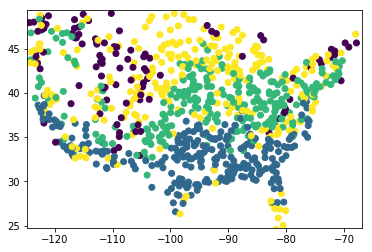

In [147]:
compiledDF = denseDF.merge(locDF, left_index = True, right_on = 'id')
climateLocDF = compiledDF[['longitude','latitude','Climate']]
colorMap = {0:'1',1:'r',2:'b',3:'g',4:'k',5:'y',6:'m',7:0.5}

climateLocDF['Climate'].apply(lambda x: colorMap[x])
#map what stations are in dataset
top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat

plt.scatter(climateLocDF['longitude'],climateLocDF['latitude'],
            c =climateLocDF['Climate'], alpha = 1)
plt.xlim((left,right))
plt.ylim((bottom,top))
plt.show()